In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Z Score
from scipy import stats
# Robust Scaler
from sklearn.preprocessing import RobustScaler

In [5]:
df=pd.read_csv("melb_data_1.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
df.dtypes  #datatype of each column

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
df.isna().sum() # null values per column

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
print("The Shape is, ",df.shape )#shape
df.describe()

The Shape is,  (13580, 21)


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## remove null values

In [9]:
# Get numeric columns (excluding the last column)
numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
print("numeric columns",numeric_columns)
df[numeric_columns]=df[numeric_columns].fillna(df[numeric_columns].mean())
print("\nThe shape is ",df.shape)
df.isna().sum()

numeric columns ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

The shape is  (13580, 21)


Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
df=df.ffill()  #forward fill the null values by previous non null values
df=df.bfill()  # backward fill in background
df.isna().sum()   # can fill object datatypes as well

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [11]:
# To remove the null values we use this
df.interpolate(inplace=True)
# print(empty_arr)
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [12]:
#  to change a data type
df=df.astype({'YearBuilt':int})
df.dtypes
""" # rename a column
df.rename(columns={'parental level of education':'Education'},inplace = True)  #note syntax :
df"""

" # rename a column\ndf.rename(columns={'parental level of education':'Education'},inplace = True)  #note syntax :\ndf"

In [13]:
arr=df['Rooms'].unique() # unique values present in column
print("Uniques in Rooms ",arr,"\n")
df['Landsize'] = np.sqrt(df['Landsize'])   # calculate square root in place
df

Uniques in Rooms  [ 2  3  4  1  6  5  8  7 10] 



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,14.212670,151.96765,1964,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,12.489996,79.00000,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,11.575837,150.00000,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,9.695360,151.96765,1964,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,10.954451,142.00000,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,25.534291,151.96765,1981,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,18.248288,133.00000,1995,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,20.880613,151.96765,1997,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,29.427878,157.00000,1920,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0


# Categorical Replacement

In [14]:
!pip install category_encoders

import category_encoders as ce

Defaulting to user installation because normal site-packages is not writeable


In [15]:
# 1. Label Encoding for 'Rooms'
# label_encoder_rooms = LabelEncoder()
df['Rooms_LabelEncoded']=df['Rooms']
df['Rooms_LabelEncoded'].replace([1,2,3,4,5,6,7,8,10],
                    ['1BHK','2BHK','3BHK','4BHK','5BHK','6BHK','7BHK','8BHK','10BHK'],inplace=True)
# df
# df['Rooms_LabelEncoded'] = label_encoder_rooms.fit_transform(df['Rooms'])
new_arr=['Rooms_LabelEncoded','Rooms']
# Display the DataFrame after Label Encoding for 'Rooms'
print("\nDataFrame after Label Encoding for 'Rooms':")
df[new_arr]


DataFrame after Label Encoding for 'Rooms':


,Rooms_LabelEncoded,Rooms
0,2BHK,2
1,2BHK,2
2,3BHK,3
3,3BHK,3
4,4BHK,4
...,...,...
13575,4BHK,4
13576,3BHK,3
13577,3BHK,3
13578,4BHK,4


In [16]:

# 2. One-Hot Encoding for 'Rooms'
df_one_hot_rooms = pd.get_dummies(df, columns=['Rooms'], prefix=['Rooms'])

# Display the DataFrame after One-Hot Encoding for 'Rooms' 
# number of colums increases now of categories = number of new columns
print("\nDataFrame after One-Hot Encoding for 'Rooms':")
df_one_hot_rooms


DataFrame after One-Hot Encoding for 'Rooms':


,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Rooms_LabelEncoded,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10
0,Abbotsford,85 Turner St,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,2BHK,0,1,0,0,0,0,0,0,0
1,Abbotsford,25 Bloomburg St,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,2BHK,0,1,0,0,0,0,0,0,0
2,Abbotsford,5 Charles St,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,3BHK,0,0,1,0,0,0,0,0,0
3,Abbotsford,40 Federation La,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,3BHK,0,0,1,0,0,0,0,0,0
4,Abbotsford,55a Park St,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,4BHK,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,...,4BHK,0,0,0,1,0,0,0,0,0
13576,Williamstown,77 Merrett Dr,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,...,3BHK,0,0,1,0,0,0,0,0,0
13577,Williamstown,83 Power St,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,...,3BHK,0,0,1,0,0,0,0,0,0
13578,Williamstown,96 Verdon St,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,...,4BHK,0,0,0,1,0,0,0,0,0


# Normalization

In [17]:
df['Distance_copy'] = (df['Distance'] - df['Distance'].min()) / (df['Distance'].max() - df['Distance'].min())
# Display the DataFrame with the normalized column using min-max normalization
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms_LabelEncoded,Distance_copy
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,14.212670,151.96765,1964,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,2BHK,0.051975
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,12.489996,79.00000,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2BHK,0.051975
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,11.575837,150.00000,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3BHK,0.051975
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,9.695360,151.96765,1964,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3BHK,0.051975
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,10.954451,142.00000,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,4BHK,0.051975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,25.534291,151.96765,1981,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,4BHK,0.347193
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,18.248288,133.00000,1995,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0,3BHK,0.141372
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,20.880613,151.96765,1997,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0,3BHK,0.141372
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,29.427878,157.00000,1920,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0,4BHK,0.141372


In [18]:

# Drop the 'Distance_copy' column with inplace
#axis =1 column    0 is row

df.drop(['Distance_copy'], axis=1, inplace=True)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms_LabelEncoded
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,14.212670,151.96765,1964,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,2BHK
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,12.489996,79.00000,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2BHK
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,11.575837,150.00000,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3BHK
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,9.695360,151.96765,1964,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3BHK
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,10.954451,142.00000,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,4BHK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,25.534291,151.96765,1981,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,4BHK
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,18.248288,133.00000,1995,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0,3BHK
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,20.880613,151.96765,1997,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0,3BHK
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,29.427878,157.00000,1920,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0,4BHK


# Outliers

In [19]:
# IQR 
# Calculate the first quartile (Q1) and third quartile (Q3) for 'fare_amount'
Q1 = df['Price'].quantile(0.25)
Q3 = np.percentile(df['Price'], 75, interpolation='midpoint')

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
column='Price'
# Print the results
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

threshold = 1.5
# Filter out values that are outside the threshold
df_filtered = df[(df[column] >= Q1 - threshold*IQR) & (df[column] <= Q3 + threshold*IQR)]
df_filtered

Q1: 650000.0
Q3: 1330000.0
IQR: 680000.0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms_LabelEncoded
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,14.212670,151.96765,1964,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,2BHK
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,12.489996,79.00000,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2BHK
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,11.575837,150.00000,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3BHK
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,9.695360,151.96765,1964,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3BHK
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,10.954451,142.00000,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,4BHK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2.0,16.000000,151.96765,1964,Maribyrnong,-37.67917,144.89390,Northern Metropolitan,2474.0,3BHK
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,25.534291,151.96765,1981,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,4BHK
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,18.248288,133.00000,1995,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0,3BHK
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,20.880613,151.96765,1997,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0,3BHK


In [20]:
print(df['Price'],df_filtered['Price'])

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64 0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13574     582000.0
13575    1245000.0
13576    1031000.0
13577    1170000.0
13579    1285000.0
Name: Price, Length: 12968, dtype: float64


OLD skew 1.6769370831513803


<Axes: ylabel='Frequency'>

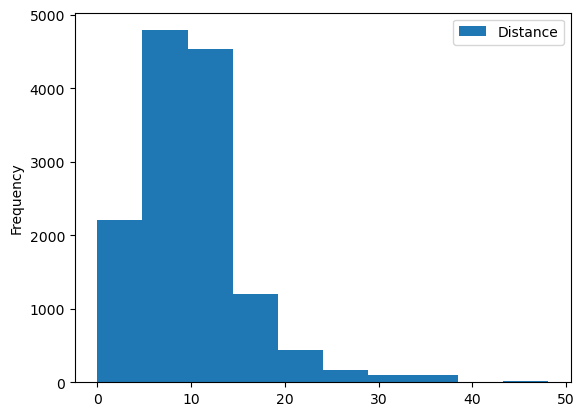

In [21]:
print("OLD skew",df['Distance'].skew())
df.plot(kind='hist', y='Distance')  # Almost normal

# Z score

In [22]:
col2="Distance"
z = np.abs(stats.zscore(df[col2]))
print("z array\n",np.where(z>3))
df=df[z<=3] # changes in same column
df

z array
 (array([ 8741,  8782,  8814,  8815,  8816,  8817,  8827,  8835,  8871,
        8872,  8895,  8896,  8939,  8942,  8957,  8958,  8959,  9085,
        9086,  9087,  9088,  9128,  9161,  9162,  9176,  9226,  9227,
        9228,  9316,  9337,  9338,  9435,  9476,  9477,  9549,  9568,
        9614,  9621,  9622,  9718,  9723,  9735,  9792,  9798,  9832,
        9883,  9884,  9885,  9886,  9952,  9953,  9954,  9967,  9978,
       10003, 10033, 10039, 10043, 10045, 10057, 10137, 10138, 10191,
       10281, 10282, 10283, 10284, 10315, 10394, 10395, 10396, 10500,
       10504, 10520, 10546, 10576, 10582, 10583, 10620, 10630, 10672,
       10673, 10693, 10696, 10697, 10740, 10741, 10742, 10758, 10812,
       10832, 10833, 10834, 10911, 10938, 10958, 10959, 10978, 11030,
       11031, 11032, 11100, 11102, 11117, 11133, 11311, 11312, 11339,
       11344, 11369, 11370, 11371, 11372, 11429, 11430, 11431, 11451,
       11452, 11469, 11470, 11499, 11500, 11501, 11502, 11590, 11598,
       115

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms_LabelEncoded
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,14.212670,151.96765,1964,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,2BHK
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,12.489996,79.00000,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2BHK
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,11.575837,150.00000,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3BHK
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,9.695360,151.96765,1964,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3BHK
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,10.954451,142.00000,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,4BHK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,25.534291,151.96765,1981,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,4BHK
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,18.248288,133.00000,1995,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0,3BHK
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,20.880613,151.96765,1997,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0,3BHK
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,29.427878,157.00000,1920,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0,4BHK


<Axes: xlabel='Distance', ylabel='Price'>

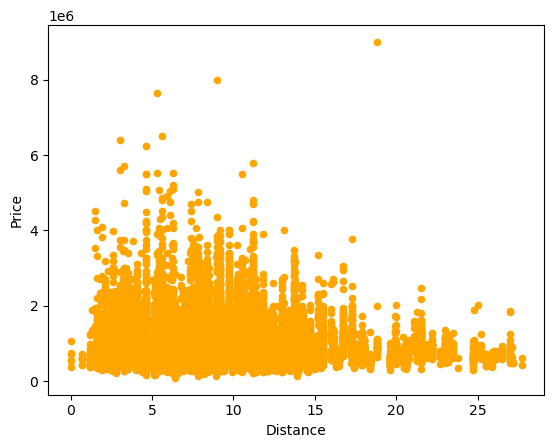

In [23]:
# Scatter plot
df.plot(kind='scatter', x='Distance', y='Price', alpha=1, color='orange')

C:\Users\USER\AppData\Local\Temp\ipykernel_16620\828759028.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Skew for all cols",df.skew())


Skew for all cols Rooms             0.387146
Price             2.229280
Distance          0.689427
Postcode          2.765802
Bedroom2          0.789660
Bathroom          1.385378
Car               1.367153
Landsize         10.416226
BuildingArea     33.782067
YearBuilt        -1.951253
Lattitude        -0.137467
Longtitude       -0.095026
Propertycount     1.085136
dtype: float64


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

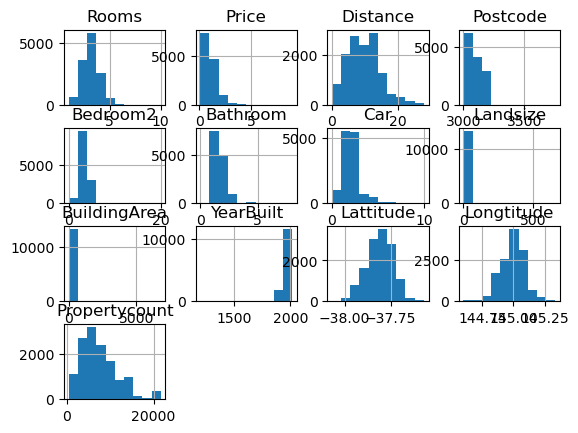

In [24]:
print("Skew for all cols",df.skew())
df.hist()

new skew 0.689427351651881


<Axes: ylabel='Frequency'>

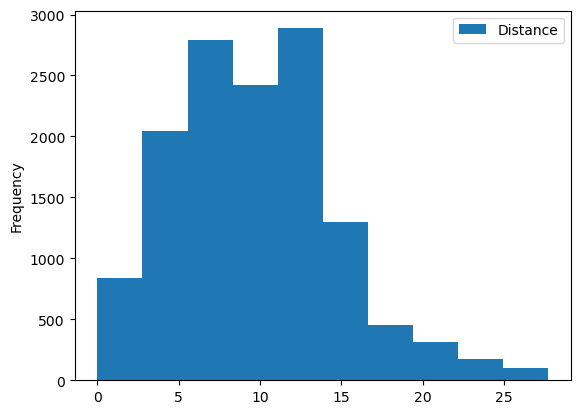

In [25]:
print("new skew",df['Distance'].skew())
df.plot(kind='hist', y='Distance')  # Almost normal

<Axes: ylabel='Distance'>

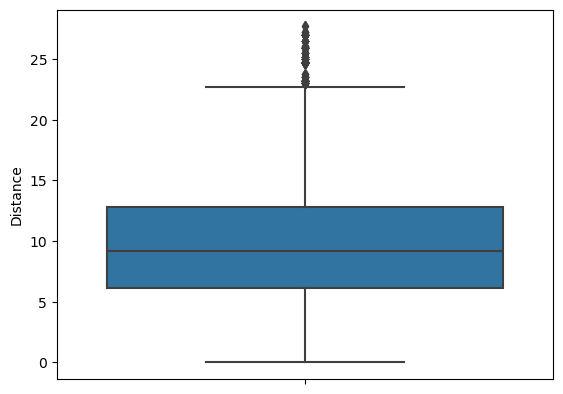

In [26]:
# Visualize Outliers
sns.boxplot(y=col2,data=df,orient='v')

### 3rd asgn

In [28]:
df2=sns.load_dataset("iris")
print(df2['species'].unique())
df2

['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [33]:
species=['setosa' 'versicolor' 'virginica']
df2.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

# Step 3: Plot histograms

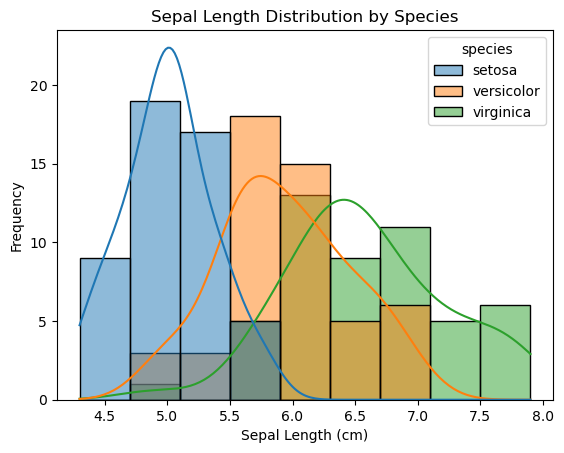

In [36]:
# Step 3: Plot histograms
sns.histplot(data=df2, x='sepal_length', hue='species', kde=True)
plt.title('Sepal Length Distribution by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()